In [79]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [80]:
df=pd.read_csv('tested.csv')

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [82]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [83]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [84]:
df.isnull().sum()#or df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [85]:
df.shape

(418, 12)

# Data Cleaning

In [86]:
df.drop('PassengerId',inplace=True,axis=1)

In [87]:
df['Cabin'].count()/df.shape[0]

0.21770334928229665

In [88]:
df.drop('Cabin',inplace=True,axis=1)#because there is more than 70% empty values

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Name      418 non-null    object 
 3   Sex       418 non-null    object 
 4   Age       332 non-null    float64
 5   SibSp     418 non-null    int64  
 6   Parch     418 non-null    int64  
 7   Ticket    418 non-null    object 
 8   Fare      417 non-null    float64
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [90]:
df['Age'].count()/df.shape[0]

0.7942583732057417

In [91]:
df.dropna(subset=['Age','Embarked'],inplace=True)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 0 to 415
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  332 non-null    int64  
 1   Pclass    332 non-null    int64  
 2   Name      332 non-null    object 
 3   Sex       332 non-null    object 
 4   Age       332 non-null    float64
 5   SibSp     332 non-null    int64  
 6   Parch     332 non-null    int64  
 7   Ticket    332 non-null    object 
 8   Fare      331 non-null    float64
 9   Embarked  332 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 28.5+ KB


In [93]:
df['Title']=df['Name'].str.extract(r'([A-Za-z]+\.)',expand=False)
df.drop('Name',inplace=True,axis=1)

In [94]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,0,3,male,34.50,0,0,330911,7.8292,Q,Mr.
1,1,3,female,47.00,1,0,363272,7.0000,S,Mrs.
2,0,2,male,62.00,0,0,240276,9.6875,Q,Mr.
3,0,3,male,27.00,0,0,315154,8.6625,S,Mr.
4,1,3,female,22.00,1,1,3101298,12.2875,S,Mrs.
5,0,3,male,14.00,0,0,7538,9.2250,S,Mr.
6,1,3,female,30.00,0,0,330972,7.6292,Q,Miss.
7,0,2,male,26.00,1,1,248738,29.0000,S,Mr.
8,1,3,female,18.00,0,0,2657,7.2292,C,Mrs.
9,0,3,male,21.00,2,0,A/4 48871,24.1500,S,Mr.


In [95]:
df['Survived'].value_counts()

0    205
1    127
Name: Survived, dtype: int64

# EDA

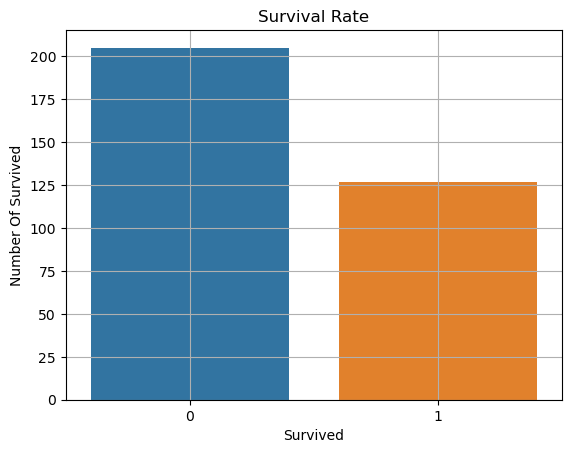

In [96]:
sns.countplot(data=df,x='Survived')
plt.ylabel('Number Of Survived')
plt.title('Survival Rate')
plt.grid()
plt.show()

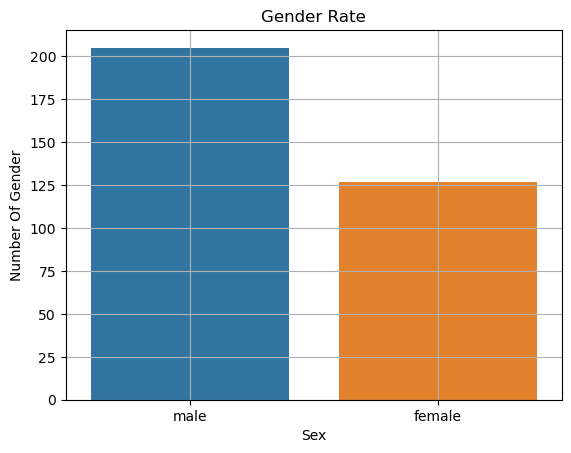

In [97]:
sns.countplot(x='Sex',data=df)
plt.ylabel('Number Of Gender')
plt.title('Gender Rate')
plt.grid()
plt.show()

In [98]:
df['Sex'].value_counts()

male      205
female    127
Name: Sex, dtype: int64

In [99]:
df['Pclass'].value_counts()

3    146
1     98
2     88
Name: Pclass, dtype: int64

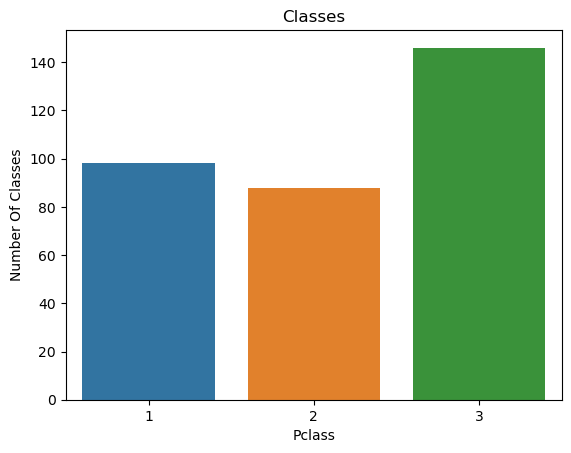

In [100]:
sns.countplot(x='Pclass',data=df)
plt.ylabel('Number Of Classes')
plt.title('Classes')
plt.show()

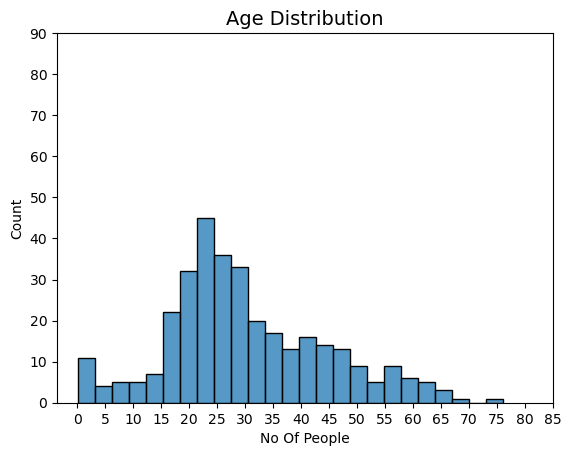

In [101]:
sns.histplot(df['Age'],bins=25)
plt.yticks(np.arange(0,100,10))
plt.xticks(np.arange(0,90,5))
plt.title('Age Distribution',fontsize=14)
plt.xlabel('No Of People')
plt.show()

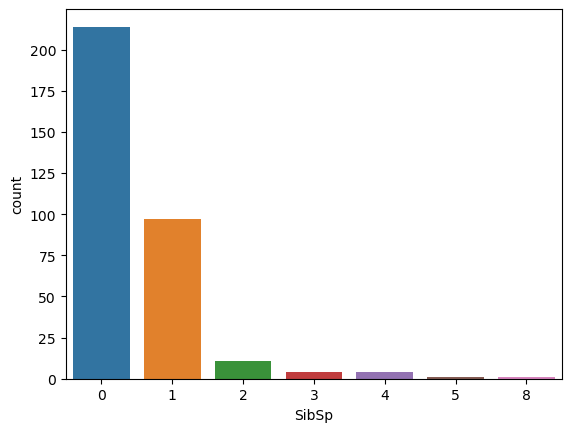

In [102]:
sns.countplot(x='SibSp',data=df)
plt.show()

<AxesSubplot:xlabel='Parch', ylabel='count'>

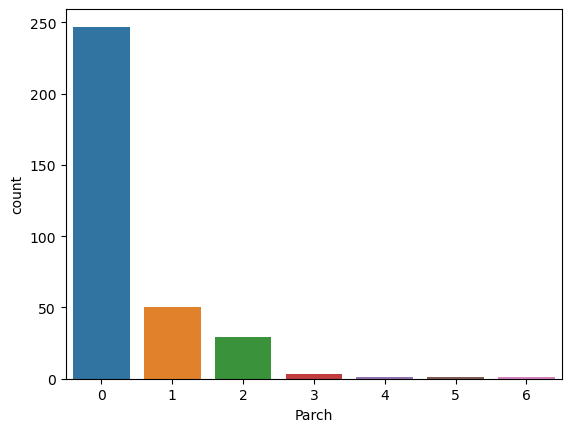

In [103]:
sns.countplot(x='Parch',data=df)

In [104]:
print('Siblings:\n',df['SibSp'].value_counts())
print('Parents : \n',df['Parch'].value_counts())

Siblings:
 0    214
1     97
2     11
3      4
4      4
5      1
8      1
Name: SibSp, dtype: int64
Parents : 
 0    247
1     50
2     29
3      3
4      1
6      1
5      1
Name: Parch, dtype: int64


In [105]:
df.min()

Survived         0
Pclass           1
Sex         female
Age           0.17
SibSp            0
Parch            0
Ticket      110469
Fare           0.0
Embarked         C
Title         Col.
dtype: object

In [106]:
df.mean()

C:\Users\leela\AppData\Local\Temp\ipykernel_11168\3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


Survived     0.382530
Pclass       2.144578
Age         30.272590
SibSp        0.481928
Parch        0.397590
Fare        40.982087
dtype: float64

In [107]:
df.max()

Survived              1
Pclass                3
Sex                male
Age                76.0
SibSp                 8
Parch                 6
Ticket      W.E.P. 5734
Fare           512.3292
Embarked              S
Title              Rev.
dtype: object

In [108]:
df.mode()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,0.0,3.0,male,21.0,0.0,0.0,PC 17608,26.0,S,Mr.
1,NaN,NaN,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN


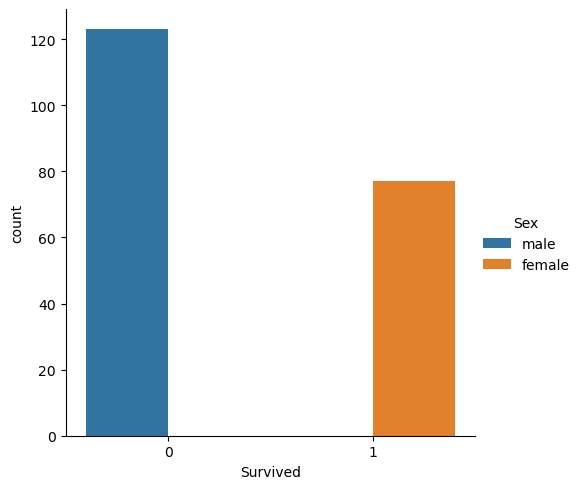

In [109]:
ind=df[df['Age']>30].index
df_1=df.drop(ind,axis=0)
sns.catplot(x='Survived',hue='Sex',kind='count',data=df_1)
plt.show()

In [110]:
df.groupby('Survived')['Sex'].value_counts()

Survived  Sex   
0         male      205
1         female    127
Name: Sex, dtype: int64

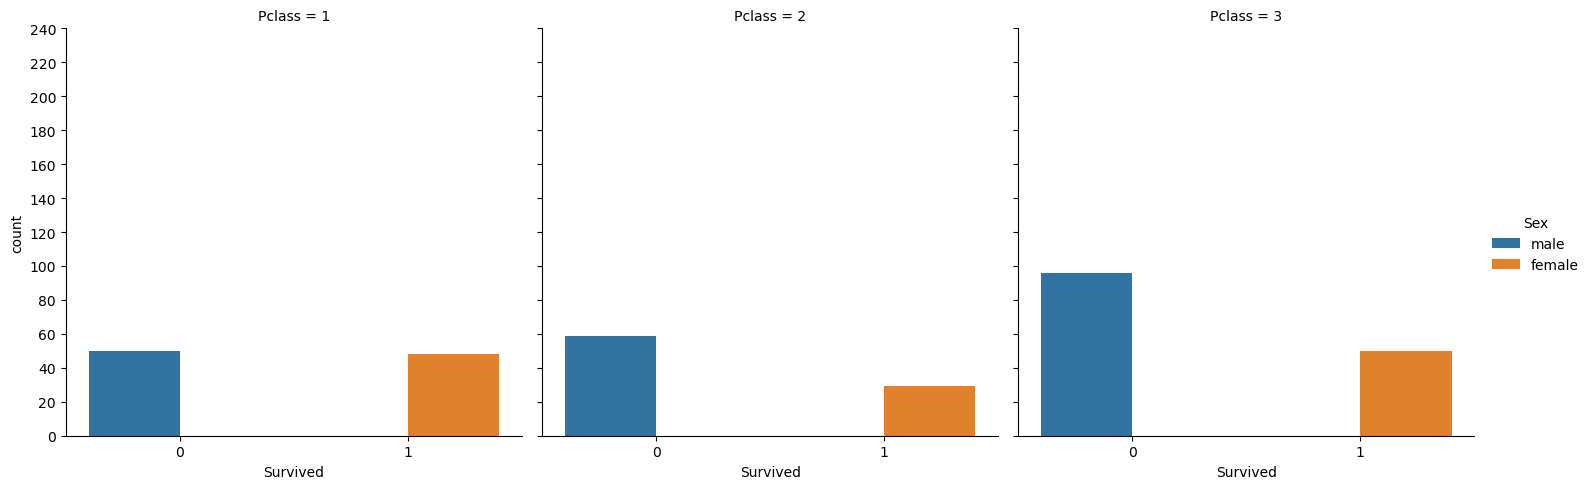

In [111]:
sns.catplot(x='Survived',hue='Sex',col='Pclass',data=df,kind='count')
plt.yticks(np.arange(0,250,20))
plt.show()

In [112]:
df.groupby(['Survived','Pclass'])['Sex'].value_counts()

Survived  Pclass  Sex   
0         1       male      50
          2       male      59
          3       male      96
1         1       female    48
          2       female    29
          3       female    50
Name: Sex, dtype: int64

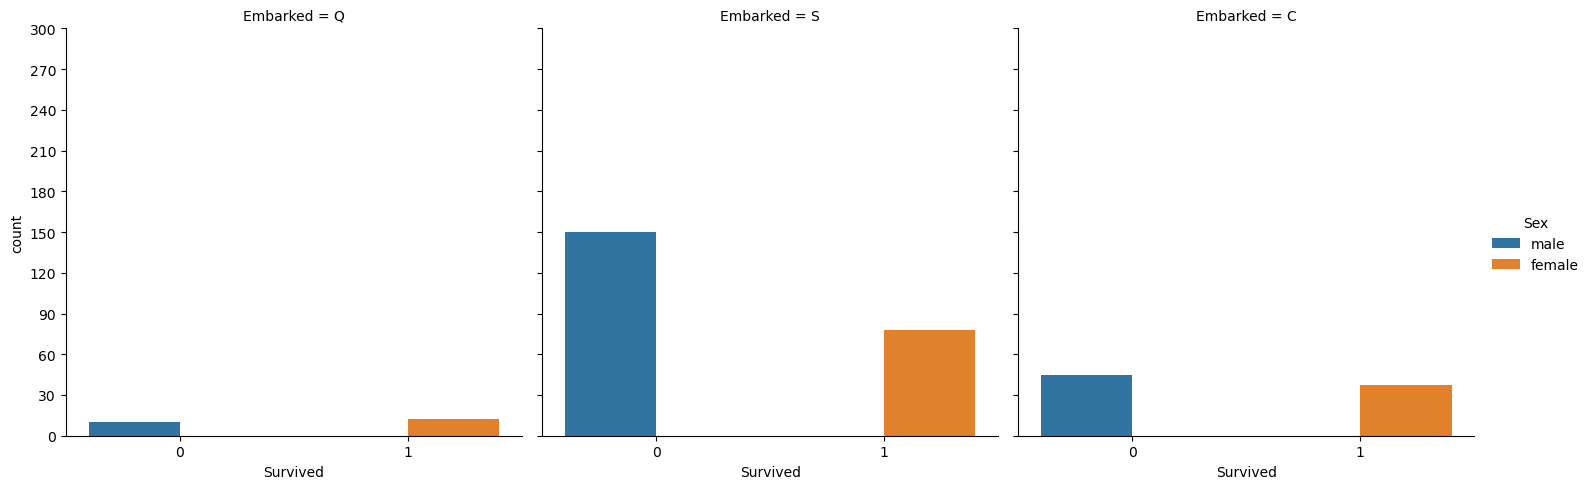

In [113]:
sns.catplot(x='Survived',hue='Sex',col='Embarked',data=df,kind='count')
plt.yticks(np.arange(0,330,30))
plt.show()

In [114]:
df.groupby(['Survived','Embarked'])['Sex'].value_counts()

Survived  Embarked  Sex   
0         C         male       45
          Q         male       10
          S         male      150
1         C         female     37
          Q         female     12
          S         female     78
Name: Sex, dtype: int64

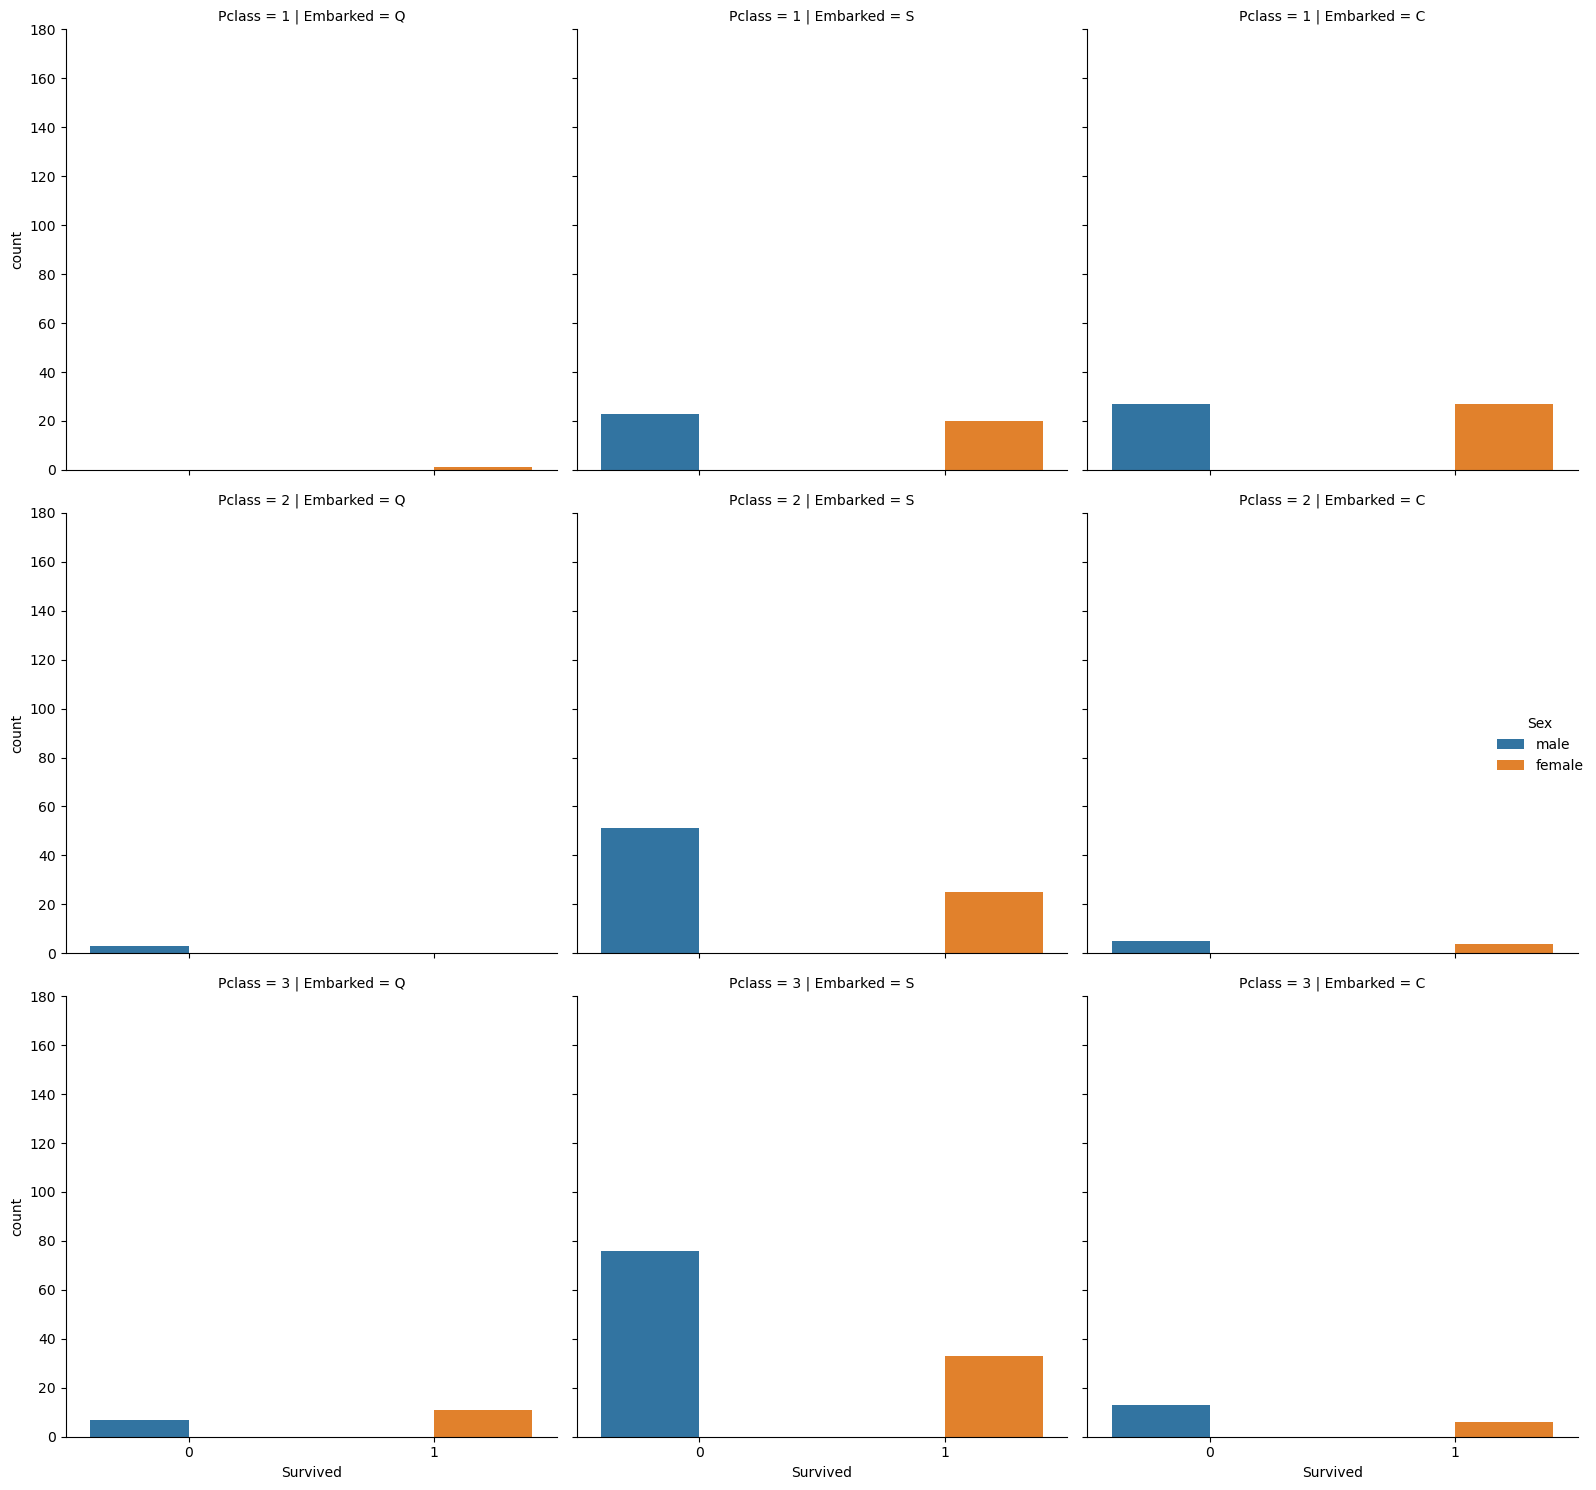

In [115]:
sns.catplot(x='Survived',hue='Sex',col='Embarked',row='Pclass',data=df,kind='count')
plt.yticks(np.arange(0,190,20))
plt.tight_layout()
plt.show()

In [116]:
df.groupby(['Survived','Embarked','Pclass'])['Sex'].value_counts()

Survived  Embarked  Pclass  Sex   
0         C         1       male      27
                    2       male       5
                    3       male      13
          Q         2       male       3
                    3       male       7
          S         1       male      23
                    2       male      51
                    3       male      76
1         C         1       female    27
                    2       female     4
                    3       female     6
          Q         1       female     1
                    3       female    11
          S         1       female    20
                    2       female    25
                    3       female    33
Name: Sex, dtype: int64

<AxesSubplot:>

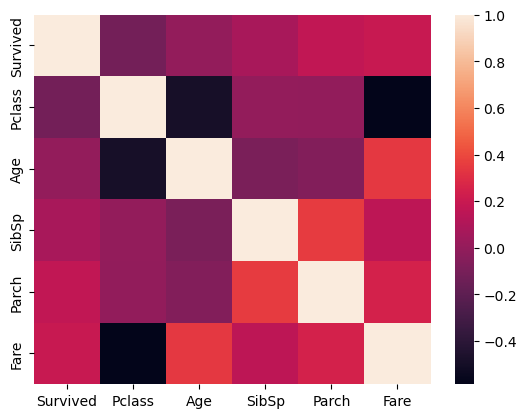

In [117]:
sns.heatmap(df.corr())

C:\Users\leela\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


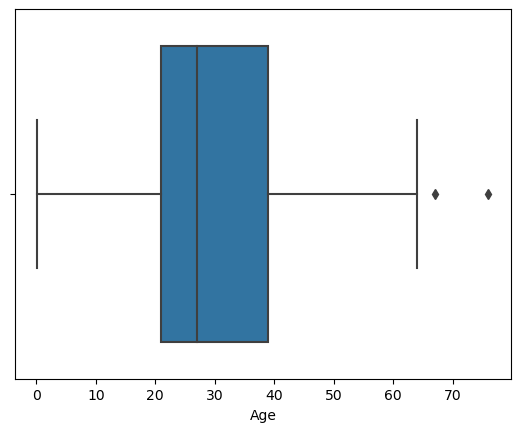

In [118]:
sns.boxplot(df['Age'])
plt.show()

In [119]:
def boundaries(data,col,dis):
    Q1=data[col].quantile(0.25)
    Q3=data[col].quantile(0.75)
    IQR=Q3-Q1
    low=Q1-(IQR*dis)
    upper=Q3+(IQR*dis)
    return low,upper

In [120]:
lower,upper=boundaries(df,'Age',1.5)
print('Lower Range : ',lower,' Upper Range : ',upper)

Lower Range :  -6.0  Upper Range :  66.0


In [121]:
#Age_out=np.where(df['Age']>upper,True,(np.where(df['Age']<lower,True,False)))
not_out=(df['Age']<upper)&(df['Age']>lower)
df['Age'][~not_out].count()

2

In [122]:
df=df[not_out]

C:\Users\leela\AppData\Local\Temp\ipykernel_11168\1142866331.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Agebin']=pd.cut(df['Age'],5,labels=['a','b','c','d','e'],include_lowest=True)


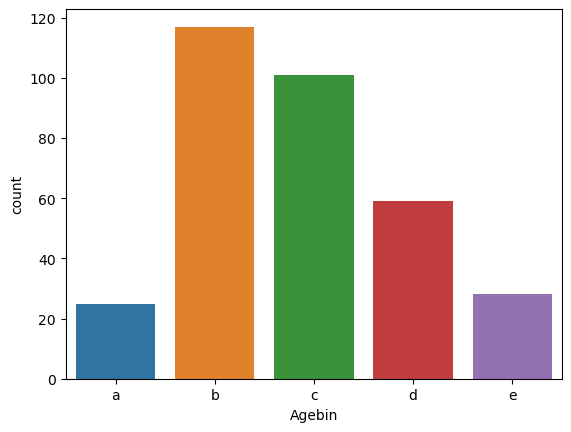

In [123]:
df['Agebin']=pd.cut(df['Age'],5,labels=['a','b','c','d','e'],include_lowest=True)
sns.countplot(x='Agebin',data=df)
plt.show()

In [124]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Agebin
0,0,3,male,34.50,0,0,330911,7.8292,Q,Mr.,c
1,1,3,female,47.00,1,0,363272,7.0000,S,Mrs.,d
2,0,2,male,62.00,0,0,240276,9.6875,Q,Mr.,e
3,0,3,male,27.00,0,0,315154,8.6625,S,Mr.,c
4,1,3,female,22.00,1,1,3101298,12.2875,S,Mrs.,b
5,0,3,male,14.00,0,0,7538,9.2250,S,Mr.,b
6,1,3,female,30.00,0,0,330972,7.6292,Q,Miss.,c
7,0,2,male,26.00,1,1,248738,29.0000,S,Mr.,c
8,1,3,female,18.00,0,0,2657,7.2292,C,Mrs.,b
9,0,3,male,21.00,2,0,A/4 48871,24.1500,S,Mr.,b


# Applying ML

In [125]:
df.drop(['Ticket','Agebin'],axis=1,inplace=True)

C:\Users\leela\AppData\Local\Temp\ipykernel_11168\2653946210.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Ticket','Agebin'],axis=1,inplace=True)


In [126]:
from sklearn.preprocessing import LabelEncoder
lb_en=LabelEncoder()
df['Sex']=lb_en.fit_transform(df['Sex'])
df

C:\Users\leela\AppData\Local\Temp\ipykernel_11168\3072481950.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex']=lb_en.fit_transform(df['Sex'])


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,34.50,0,0,7.8292,Q,Mr.
1,1,3,0,47.00,1,0,7.0000,S,Mrs.
2,0,2,1,62.00,0,0,9.6875,Q,Mr.
3,0,3,1,27.00,0,0,8.6625,S,Mr.
4,1,3,0,22.00,1,1,12.2875,S,Mrs.
5,0,3,1,14.00,0,0,9.2250,S,Mr.
6,1,3,0,30.00,0,0,7.6292,Q,Miss.
7,0,2,1,26.00,1,1,29.0000,S,Mr.
8,1,3,0,18.00,0,0,7.2292,C,Mrs.
9,0,3,1,21.00,2,0,24.1500,S,Mr.


In [127]:
df['Embarked']=lb_en.fit_transform(df['Embarked'])
df['Title']=lb_en.fit_transform(df['Title'])
df

C:\Users\leela\AppData\Local\Temp\ipykernel_11168\2719491505.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Embarked']=lb_en.fit_transform(df['Embarked'])
C:\Users\leela\AppData\Local\Temp\ipykernel_11168\2719491505.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Title']=lb_en.fit_transform(df['Title'])


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,34.50,0,0,7.8292,1,5
1,1,3,0,47.00,1,0,7.0000,2,6
2,0,2,1,62.00,0,0,9.6875,1,5
3,0,3,1,27.00,0,0,8.6625,2,5
4,1,3,0,22.00,1,1,12.2875,2,6
5,0,3,1,14.00,0,0,9.2250,2,5
6,1,3,0,30.00,0,0,7.6292,1,4
7,0,2,1,26.00,1,1,29.0000,2,5
8,1,3,0,18.00,0,0,7.2292,0,6
9,0,3,1,21.00,2,0,24.1500,2,5


In [128]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score,confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

In [129]:
x=df.drop('Survived',axis=1)
y=df['Survived']

In [130]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3)

In [131]:
Li_Re=LinearRegression()

In [132]:
Li_Re.fit(x_train,y_train)

LinearRegression()

In [133]:
y_test_pre=Li_Re.predict(x_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
y_train_pre=Li_Re.predict(x_train)

In [ ]:
r2_score(y_test,y_test_pre)

In [ ]:
r2_score(y_train,y_train_pre)

In [ ]:
#since it is classification problem not regression so

In [ ]:
#lg_Re=LogisticRegression(max_iter=500)
best_params = {
    'C': 1,
    'max_iter': 100,
    'penalty': 'l1',
    'solver': 'liblinear'
}
lg_Re = LogisticRegression(**best_params)

In [ ]:
lg_Re.fit(x_train,y_train)

In [ ]:
y_test_pre=lg_Re.predict(x_test)

In [ ]:
y_train_pre=lg_Re.predict(x_train)

In [ ]:
print(classification_report(y_test,y_test_pre))

In [ ]:
print(classification_report(y_train,y_train_pre))

In [ ]:
print('Accuracy : ',lg_Re.score(x_test,y_test)*100)

In [ ]:
kfd=KFold(n_splits=10,random_state=100,shuffle=True)

In [ ]:
res=cross_val_score(lg_Re,x,y,cv=kfd,n_jobs=-1)
print('Accuracy : ',res.mean()*100)

In [ ]:
rkfd=RepeatedKFold(n_splits=10,random_state=100,n_repeats=2)
res1=cross_val_score(lg_Re,x,y,cv=rkfd,n_jobs=-1)
print('Accuracy : ',res1.mean()*100)

In [ ]:
skflod=StratifiedKFold(n_splits=10,random_state=100,shuffle=True)
res2=cross_val_score(lg_Re,x,y,cv=skflod,n_jobs=-1)
print('Accuracy : ',res2.mean()*100)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their possible values for tuning
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga'],  # Include only solvers compatible with l1 penalty
    'max_iter': [100, 200, 300,500]
}


# Create a GridSearchCV instance
grid_search = GridSearchCV(lg_Re, param_grid, cv=5, n_jobs=-1)

# Fit the grid search to your data
grid_search.fit(x_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


In [ ]:
print(best_model,best_params)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
#DTC=DecisionTreeClassifier()
DTC= DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='log2',
                       min_samples_leaf=2, splitter='random')

In [ ]:
DTC.fit(x_train,y_train)

In [ ]:
y_pre_test=DTC.predict(x_test)

In [ ]:
y_pre_train=DTC.predict(x_train)

In [ ]:
print(classification_report(y_test,y_pre_test))

In [ ]:
print(classification_report(y_train,y_pre_train))

In [ ]:
print(DTC.score(x_test,y_test)*100)

In [ ]:
kflod=KFold(n_splits=220,random_state=100,shuffle=True)
D_res=cross_val_score(DTC,x,y,cv=kflod,n_jobs=-1)
print('Accuracy : ',D_res.mean()*100)

In [ ]:
refold=RepeatedKFold(n_splits=220,random_state=100,n_repeats=3)
D_res1=cross_val_score(DTC,x,y,cv=refold,n_jobs=-1)
print('Accuracy : ',D_res1.mean()*100)

In [ ]:
skfoldd=StratifiedKFold(n_splits=220,random_state=100,shuffle=True)
D_res2=cross_val_score(DTC,x,y,cv=skfoldd,n_jobs=-1)
print('Accuracy : ',D_res2.mean()*100)

In [ ]:
param_grid1 = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'splitter': ['best', 'random'],
    'class_weight': [None, 'balanced']}
    
gir_sear=GridSearchCV(DTC,param_grid1,cv=5,n_jobs=-1)
gir_sear.fit(x_train,y_train)
print(gir_sear.best_params_,gir_sear.best_estimator_,gir_sear.best_score_)

In [ ]:
#RFC=RandomForestClassifier()
RFC=RandomForestClassifier(bootstrap= False, max_depth=10, max_features= 'sqrt', min_samples_leaf= 4, min_samples_split= 10, n_estimators= 50,random_state=42)

In [ ]:
RFC.fit(x_train,y_train)
y_rfc_pre_test=RFC.predict(x_test)
y_rfc_pre_train=RFC.predict(x_train)

In [ ]:
print(classification_report(y_train,y_rfc_pre_train))
print(classification_report(y_test,y_rfc_pre_test))
print(confusion_matrix(y_test,y_rfc_pre_test))

In [ ]:
print(RFC.score(x_test,y_test))

In [ ]:
kfd_rfc=KFold(n_splits=10,shuffle=True,random_state=100)
res_kfd=cross_val_score(RFC,x,y,cv=kfd_rfc,n_jobs=-1)
print('Accuracy : ',res_kfd.mean()*100)

In [ ]:
rkfd_rfc=RepeatedKFold(n_splits=10,n_repeats=3,random_state=100)
res_rkfd=cross_val_score(RFC,x,y,cv=rkfd_rfc,n_jobs=-1)
print('Accuracy : ',res_rkfd.mean()*100)

In [ ]:
sk_res=StratifiedKFold(n_splits=10,shuffle=True,random_state=100)
res_sk=cross_val_score(RFC,x,y,cv=sk_res,n_jobs=-1)
print('Accuracy : ',res_sk.mean()*100)

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt'],
    'bootstrap': [True, False]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=RFC, param_grid=param_grid, 
                           scoring='accuracy', cv=5, n_jobs=-1)

# Fit the GridSearchCV object to your data
grid_search.fit(x_train, y_train)  # Replace X_train and y_train with your data

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)
